Objective:
The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

Dataset: [Dataset for Data preprocessing](https://drive.google.com/file/d/1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_/view)

Key Components to be fulfilled:
Data Exploration:   Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.

Data Cleaning: 
Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers.
Replace the value 0 in age as NaN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

Data Analysis:
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually

Data Encoding:
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

Feature Scaling: 
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importing datasets

In [3]:
df = pd.read_csv("Employee.csv") 
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


Here the columns 'Country' and 'Gender' has no null value

In [5]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


Here the mean and median(i.e., 50%) is almost similar, so the data must be of less outliers

In [6]:
df.shape

(148, 6)

In [7]:
df.duplicated().sum()

4

In [8]:
df.drop_duplicates(inplace = True)

<Axes: >

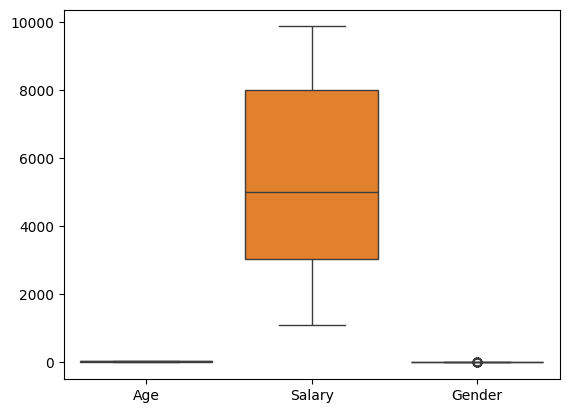

In [9]:
sns.boxplot(df.select_dtypes(include = [np.number]))

This boxplot is the not scaled so we couldn't able to compare the three different boxplot. So there is a requirement of doing scalling process. 

In [10]:
df.shape

(144, 6)

In [11]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [12]:
print("Unique values of each columns of each columns are given below -")
print("\nCompany:\n", df.Company.unique())
print("\nAge:\n", df.Age.unique())
print("\nSalary:\n", df.Salary.unique())
print("\nGender:\n", df.Gender.unique())
print("\nPlace:\n", df.Place.unique()) 
print("\nCountry:\n", df.Country.unique())

Unique values of each columns of each columns are given below -

Company:
 ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']

Age:
 [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]

Salary:
 [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]

Gender:
 [0 1]

Place:
 ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']

Country:
 ['India']


A close analysis of each column's unique values shows that there are columns with age zero that should be replaced. Also, we know that the column 'Country' is unimportant.

In [13]:
df.drop(["Country"], axis = 1, inplace = True)

In [14]:
df.Age.replace(0, np.nan, inplace = True)
df.Place.replace("Podicherry", "Puducherry", inplace = True)

In [15]:
df.isnull().sum()

Company     8
Age        23
Salary     23
Place      14
Gender      0
dtype: int64

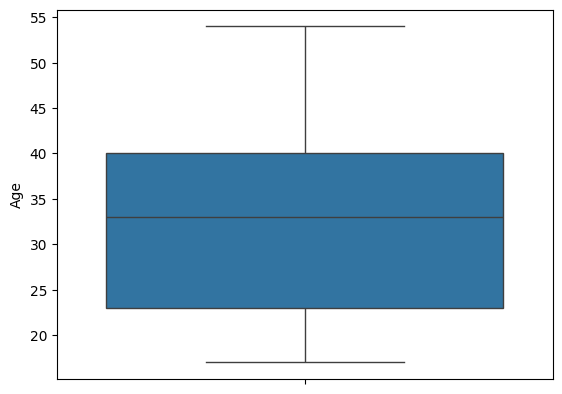

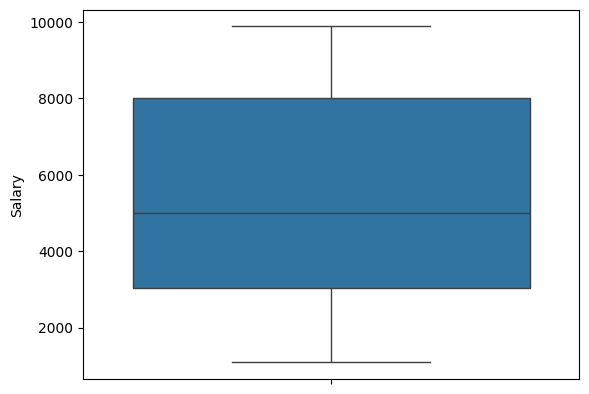

In [16]:
sns.boxplot(df.Age)
plt.show()

sns.boxplot(df.Salary) 
plt.show()


This plot shows that there are no outliers. So we can fill the null columns using mean.

In [17]:
df.Company.fillna(df.Company.mode()[0], inplace = True)
df.Salary.fillna(df.Salary.mean().round(2), inplace = True)
df.Place.fillna(df.Place.mode()[0], inplace = True)
df.Age.fillna(df.Age.mean().round(2), inplace = True) 

df.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Gender     0
dtype: int64

In [18]:
print("Unique values of each columns of each columns are given below -")
print("\nCompany:\n", df.Company.unique(), "\nand number of unique value are: ", df.Company.nunique())
print("\nAge:\n", df.Age.unique(), "\nand number of unique value are: ", df.Age.nunique())
print("\nSalary:\n", df.Salary.unique(), "\nand number of unique value are: ", df.Salary.nunique())
print("\nGender:\n", df.Gender.unique(), "\nand number of unique value are: ", df.Gender.nunique())
print("\nPlace:\n", df.Place.unique(), "\nand number of unique value are: ", df.Place.nunique()) 

Unique values of each columns of each columns are given below -

Company:
 ['TCS' 'Infosys' 'CTS' 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'] 
and number of unique value are:  6

Age:
 [20.   30.   35.   40.   23.   32.04 34.   45.   18.   22.   32.   37.
 50.   21.   46.   36.   26.   41.   24.   25.   43.   19.   38.   51.
 31.   44.   33.   17.   54.  ] 
and number of unique value are:  29

Salary:
 [5283.47 2300.   3000.   4000.   5000.   6000.   7000.   8000.   9000.
 1089.   1234.   3030.   3045.   3184.   4824.   5835.   7084.   8943.
 8345.   9284.   9876.   2034.   7654.   2934.   4034.   5034.   8202.
 9024.   4345.   6544.   6543.   3234.   4324.   5435.   5555.   8787.
 3454.   5654.   5009.   5098.   3033.  ] 
and number of unique value are:  41

Gender:
 [0 1] 
and number of unique value are:  2

Place:
 ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Puducherry' 'Cochin' 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] 
and number of unique value are:  11


From the above cell, it is clear that there is no null value, inappropriate value or other errors.

## Data Analysis

In [19]:
df1 = df[(df["Age"] > 40) & (df["Salary"] < 5000)] 
df1

,Company,Age,Salary,Place,Gender
21,Infosys,50.0,3184.0,Delhi,0
32,Infosys,45.0,4034.0,Calcutta,0
39,Infosys,41.0,3000.0,Mumbai,0
50,Infosys,41.0,3000.0,Chennai,0
57,Infosys,51.0,3184.0,Hyderabad,0
68,Infosys,43.0,4034.0,Mumbai,0
75,Infosys,44.0,3000.0,Cochin,0
86,Infosys,41.0,3000.0,Delhi,0
93,Infosys,54.0,3184.0,Mumbai,0
104,Infosys,44.0,4034.0,Delhi,0


             Age    Salary
Age     1.000000 -0.111893
Salary -0.111893  1.000000


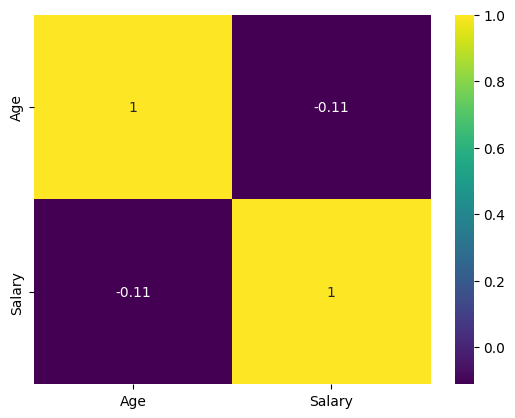

In [20]:
print(df1[["Age", "Salary"]].corr())

sns.heatmap(df1[["Age", "Salary"]].corr(), cmap = "viridis", annot = True)
plt.show()

In [21]:
df1.Place.value_counts()

Place
Delhi        4
Mumbai       4
Calcutta     2
Hyderabad    2
Cochin       2
Chennai      1
Name: count, dtype: int64

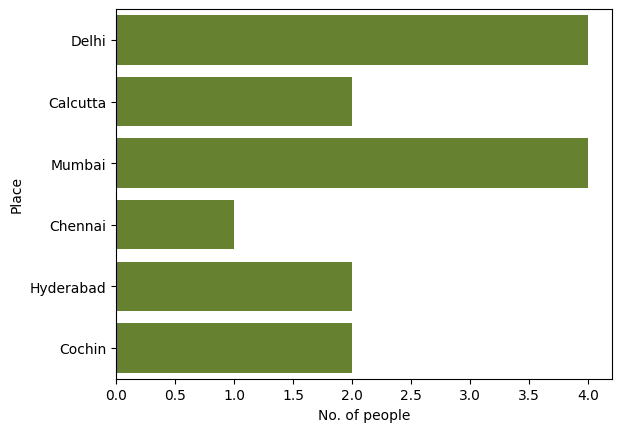

In [22]:
sns.countplot(df1.Place, color = 'olivedrab')
plt.xlabel("No. of people") 
plt.show()

## Data Encoding

In [23]:
df2 = df.copy()

In [24]:
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder() 
for i in df2.select_dtypes(include = ["object"]): 
    df2[i] = label_encoder.fit_transform(df2[i])
print(df2)

     Company   Age   Salary  Place  Gender
0          4  20.0  5283.47      2       0
1          2  30.0  5283.47      6       0
2          4  35.0  2300.00      1       0
3          2  40.0  3000.00      4       0
4          4  23.0  4000.00      6       0
..       ...   ...      ...    ...     ...
142        3  22.0  8202.00      6       0
143        4  33.0  9024.00      1       1
145        2  44.0  4034.00      4       1
146        4  33.0  5034.00      6       1
147        2  22.0  8202.00      3       0

[144 rows x 5 columns]


In [25]:
one_hot_encoder = pd.get_dummies(data = df, columns = ["Company", "Place"])
one_hot_encoder

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Puducherry,Place_Pune
0,20.0,5283.47,0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
1,30.0,5283.47,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.00,0,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.00,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.00,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.00,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
143,33.0,9024.00,1,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
145,44.0,4034.00,1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
146,33.0,5034.00,1,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
print(standard_scaler.fit_transform(one_hot_encoder)) 

[[-1.46735007e+00 -3.82514739e-07 -5.34522484e-01 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]
 [-2.48733237e-01 -3.82514739e-07 -5.34522484e-01 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]
 [ 3.60575182e-01 -1.26412238e+00 -5.34522484e-01 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]
 ...
 [ 1.45733034e+00 -5.29411609e-01  1.87082869e+00 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]
 [ 1.16851814e-01 -1.05702975e-01  1.87082869e+00 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]
 [-1.22362671e+00  1.23660598e+00 -5.34522484e-01 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]]


In [27]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
print(min_max_scaler.fit_transform(one_hot_encoder)) 

[[0.08108108 0.47734949 0.         ... 0.         0.         0.        ]
 [0.35135135 0.47734949 0.         ... 0.         0.         0.        ]
 [0.48648649 0.13781723 0.         ... 0.         0.         0.        ]
 ...
 [0.72972973 0.33515421 1.         ... 0.         0.         0.        ]
 [0.43243243 0.44895869 1.         ... 0.         0.         0.        ]
 [0.13513514 0.80949129 0.         ... 0.         0.         0.        ]]
